# Polynomial Regression
* Polynomial regression is a regressio algorithm that models the relationship between a dependent(y) and independent variable(x) as nth degree polynomial.
* Formula :-  y = b₀ + b₁X + b₂X² + b₃X³ + .... + bnXⁿ

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('../../../dataset/salary-data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [133]:
df.rename(columns={'Education Level':'Education','Job Title':'Job','Years of Experience':'Experience'},inplace=True)

In [134]:
df.isnull().sum()

Age           2
Gender        2
Education     3
Job           2
Experience    3
Salary        5
dtype: int64

In [135]:
for i in df.columns:
    df.fillna({i:df[i].mode()[0]},inplace=True) if df[i].dtype == 'O' else df.fillna({i:df[i].mean()},inplace=True)
df.isnull().sum()

Age           0
Gender        0
Education     0
Job           0
Experience    0
Salary        0
dtype: int64

In [136]:
df.drop(columns=['Age','Gender','Job','Education'],inplace=True)

<Axes: xlabel='Salary', ylabel='Experience'>

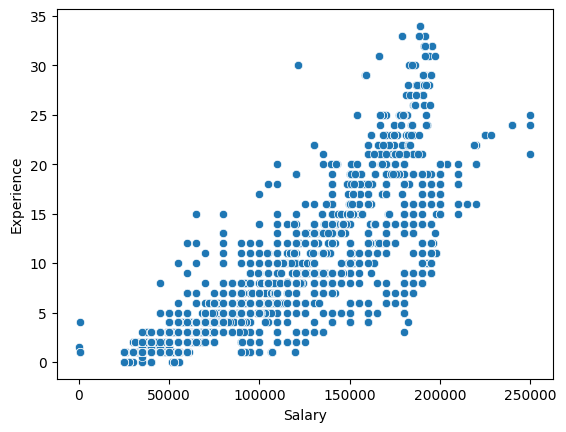

In [137]:
sns.scatterplot(x='Salary',y='Experience',data = df)

<Axes: xlabel='Salary', ylabel='Experience'>

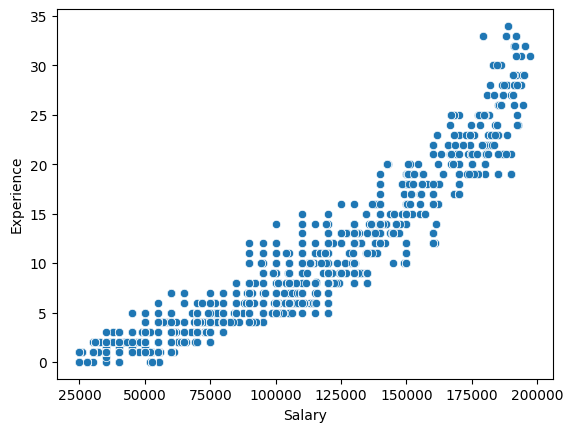

In [138]:
## cleaning the bottom part
df2 = df[~((df['Experience']<4) & (df['Salary']>80000))]
df2 = df2[~((df2['Experience']<5) & (df2['Salary']>100000))]
df2 = df2[~((df2['Experience']<8) & (df2['Salary']>120000))]
df2 = df2[~((df2['Experience']<10) & (df2['Salary']>135000))]
df2 = df2[~((df2['Experience']<12) & (df2['Salary']>150000))]
df2 = df2[~((df2['Experience']<16) & (df2['Salary']>162000))]
df2 = df2[~((df2['Experience']<19) & (df2['Salary']>175000))]
df2 = df2[~((df2['Experience']<21) & (df2['Salary']>190000))]
df2 = df2[~((df2['Experience']<26) & (df2['Salary']>200000))]

## cleaning the top part
df2 = df2[(df2['Salary']>20000)]
df2 = df2[~((df2['Experience']>7) & (df2['Salary']<85000))]
df2 = df2[~((df2['Experience']>16) & (df2['Salary']<140000))]
df2 = df2[~((df2['Experience']>24) & (df2['Salary']<165000))]
df2 = df2[~((df2['Experience']>28) & (df2['Salary']<175000))]

sns.scatterplot(x='Salary',y='Experience',data=df2)

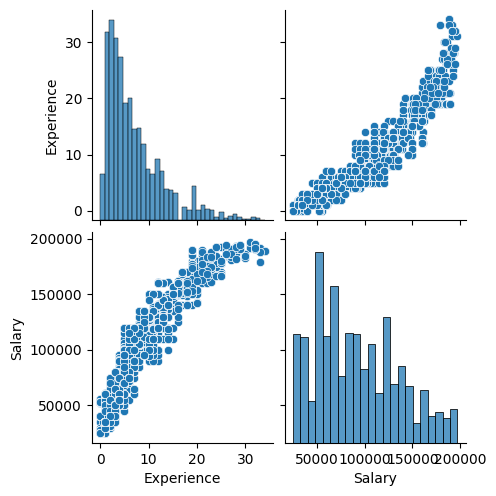

In [139]:
sns.pairplot(df2)

In [140]:
df2.corr()

,Experience,Salary
Experience,1.000000,0.920338
Salary,0.920338,1.000000


In [185]:
x = df2[['Experience']]
y = df2['Salary']

In [186]:
from sklearn.preprocessing import PolynomialFeatures

In [187]:
pf = PolynomialFeatures(degree=2)
pf.fit(x)
x = pf.transform(x)
x

array([[  1.,   5.,  25.],
       [  1.,   3.,   9.],
       [  1.,  15., 225.],
       ...,
       [  1.,   4.,  16.],
       [  1.,  14., 196.],
       [  1.,   1.,   1.]])

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75,random_state=42)

In [190]:
from sklearn.linear_model import LinearRegression


In [191]:
lr = LinearRegression()

In [192]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [193]:
lr.score(x_test,y_test)

0.9070490999060616

In [194]:
pre=lr.predict(x)

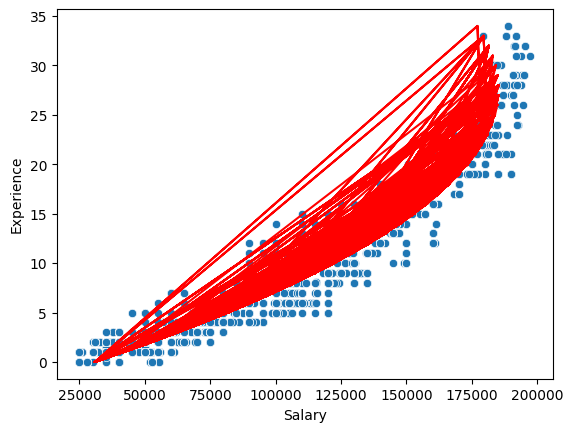

In [195]:
sns.scatterplot(x=df2['Salary'],y=df2['Experience'])
plt.plot(pre,df2['Experience'],color='r')
plt.show()

* If we want to predict the data with given input then first we need to convert that input data into the polynomial form

In [196]:
test = pf.transform([[15]])
print(test)
lr.predict(test)

[[  1.  15. 225.]]


f:\Windows 10 data\Python Files\Data Science\py_virtual_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([152941.55181753])